1.Upload và đọc dữ liệu từ file JSON

In [10]:
from google.colab import files

# Tải file JSON từ máy tính
uploaded = files.upload()

# Đọc file JSON vừa tải lên
import pandas as pd

# Lấy tên file vừa upload
file_name = list(uploaded.keys())[0]

# Đọc dữ liệu từ file JSON
df = pd.read_json(file_name, lines=True)

# Hiển thị dữ liệu mẫu
print("Dữ liệu ban đầu:")
print(df.head())


Saving filtered_user_problems_9.json to filtered_user_problems_9.json
Dữ liệu ban đầu:
           log_id  problem_id    user_id  is_correct  attempts  score  \
0  35154675972947  Pm_5972947  U_3515467           0         1    NaN   
1  35154675972948  Pm_5972948  U_3515467           1         1    NaN   
2  35154675972949  Pm_5972949  U_3515467           1         1    NaN   
3  35154675972950  Pm_5972950  U_3515467           0         1    NaN   
4  35154675972953  Pm_5972953  U_3515467           1         1    NaN   

          submit_time  
0 2020-10-08 16:42:02  
1 2020-10-08 16:47:37  
2 2020-10-08 16:47:35  
3 2020-10-08 16:47:33  
4 2020-10-08 16:47:31  


2. Tính toán số lần nộp và thử trung bình

In [12]:
# ipython-input-2-eb0413aa06b7

from google.colab import files
import pandas as pd

file_name = 'filtered_user_problems_9.json'  # Replace with your file name
df = pd.read_json(file_name, lines=True)

# Tính toán số lần thử và số lần nộp trung bình
average_attempts = df['attempts'].mean()  # Số lần thử trung bình
submission_count = len(df)  # Tổng số lần nộp

print(f"Số lần thử trung bình: {average_attempts:.2f}")
print(f"Tổng số lần nộp: {submission_count}")

Số lần thử trung bình: 1.03
Tổng số lần nộp: 55963


3. Tính Chỉ số thử thách và gán nhãn

In [13]:
# Tính toán chỉ số thử thách
def challenge_label(row, avg_attempts, total_submissions):
    if row['attempts'] <= avg_attempts * 0.5:
        return 1  # Thấp, không thử thách
    elif avg_attempts * 0.5 < row['attempts'] <= avg_attempts:
        return 2  # Trung bình thấp
    elif avg_attempts < row['attempts'] <= avg_attempts * 1.5:
        return 3  # Trung bình
    elif avg_attempts * 1.5 < row['attempts'] <= avg_attempts * 2:
        return 4  # Khó
    else:
        return 5  # Rất khó

# Áp dụng gán nhãn
df['challenge_index'] = df.apply(lambda row: challenge_label(row, average_attempts, submission_count), axis=1)

print("Dữ liệu sau khi gán nhãn:")
print(df[['user_id', 'problem_id', 'attempts', 'challenge_index']].head())


Dữ liệu sau khi gán nhãn:
     user_id  problem_id  attempts  challenge_index
0  U_3515467  Pm_5972947         1                2
1  U_3515467  Pm_5972948         1                2
2  U_3515467  Pm_5972949         1                2
3  U_3515467  Pm_5972950         1                2
4  U_3515467  Pm_5972953         1                2


4.Biểu đồ phân phối nhãn

challenge_index
2    54420
4     1405
5      138
Name: count, dtype: int64


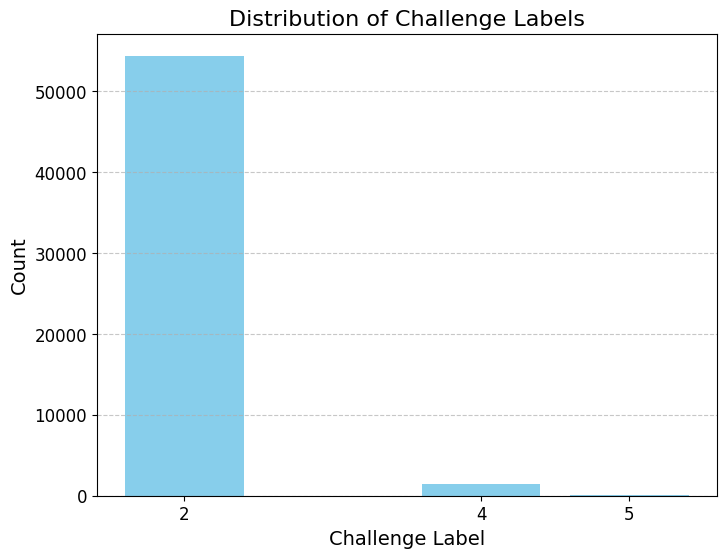

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tính phân phối nhãn
# Thay 'challenge_label' bằng 'challenge_index'
label_distribution = df['challenge_index'].value_counts().sort_index()
print(label_distribution)
# Vẽ biểu đồ phân phối nhãn bằng Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(label_distribution.index, label_distribution.values, color='skyblue')
plt.xlabel('Challenge Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Challenge Labels', fontsize=16)
plt.xticks(label_distribution.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Xuất dữ liệu ra file CSV

In [ ]:
# Lưu file CSV
output_file = "challenge_analysis.csv"
df.to_csv(output_file, index=False)

from google.colab import files

# Tải file CSV xuống máy tính
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>